# Support Vector Machine (SVM)
SVM stands for Support Vector Machine. It is a supervised machine learning algorithm used for classification and regression tasks. SVM is effective in both linear and non-linear data classification.

The basic idea behind SVM is to find the hyperplane that best separates different classes in the feature space. In a binary classification scenario, this hyperplane is the one that maximizes the margin, which is the distance between the hyperplane and the nearest data points from each class, called support vectors.

SVM can also handle non-linear data by using a technique called the kernel trick. The kernel trick implicitly maps the input features into a higher-dimensional space, where a hyperplane can linearly separate the data points. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

SVMs are popular due to their ability to handle high-dimensional data efficiently, and their robustness in dealing with overfitting, especially in cases where the number of features exceeds the number of samples. They are widely used in various fields such as image classification, text classification, and bioinformatics.

# Steps

1. **Input**: Training dataset \( D = \{(x_i, y_i)\}_{i=1}^{N} \), where \( x_i \) represents the feature vectors and \( y_i \) represents their corresponding class labels.

2. **Feature Transformation (Kernelization)**: If necessary, transform the feature vectors \( x_i \) using a kernel function \( K(x, x') \) to map them into a higher-dimensional space.

3. **Select Hyperparameters**: Choose the hyperparameters such as the regularization parameter \( C \) and the kernel parameters (if applicable) based on cross-validation or other optimization techniques.

4. **Initialize Parameters**: Initialize the weights \( w \) and the bias \( b \) of the decision function.

5. **Optimization**: Solve the optimization problem to find the optimal values of \( w \) and \( b \) that minimize the objective function, subject to the constraints defined by the margin and the training data.

6. **Training**: Train the SVM model by iteratively updating the parameters \( w \) and \( b \) using optimization techniques such as gradient descent or quadratic programming.

7. **Margin Maximization**: Maximize the margin between the decision boundary and the support vectors by minimizing the norm of the weight vector \( ||w|| \).

8. **Support Vector Identification**: Identify the support vectors, which are the data points closest to the decision boundary.

9. **Decision Boundary**: Determine the decision boundary, which separates the different classes in the feature space.

10. **Prediction**: Given a new input vector \( x \), classify it by evaluating the sign of the decision function \( f(x) = w^T x + b \). If \( f(x) \geq 0 \), classify \( x \) as one class; otherwise, classify it as the other class.

11. **Output**: Trained SVM model with optimized parameters \( w \) and \( b \).


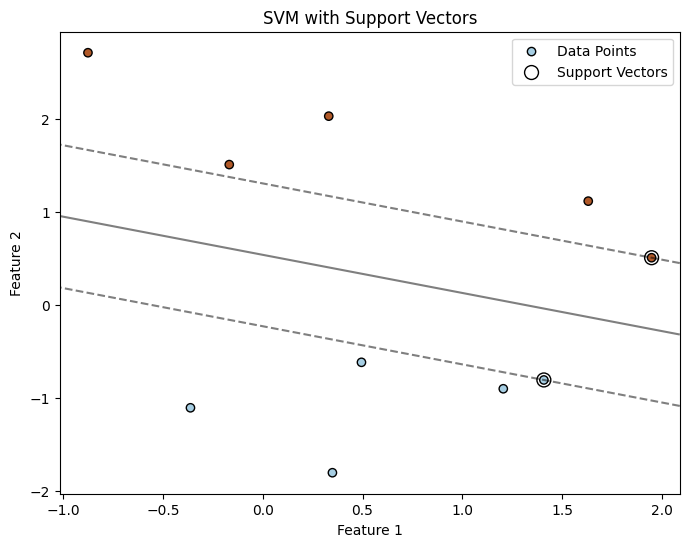

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate 2D random data
X, y = make_classification(n_samples=10, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Train SVM model
svm = SVC(kernel='linear')
svm.fit(X, y)

# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k', label='Data Points')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.title('SVM with Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Handling Non-Linear data by SVM

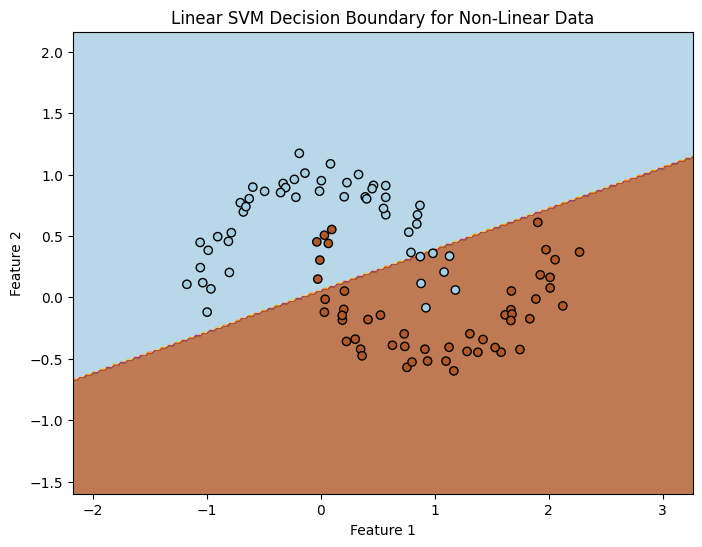

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# Generate non-linear dataset (moons)
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Train linear SVM model
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

# Plot decision boundary and data points
plt.figure(figsize=(8, 6))

# Plot decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.title('Linear SVM Decision Boundary for Non-Linear Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


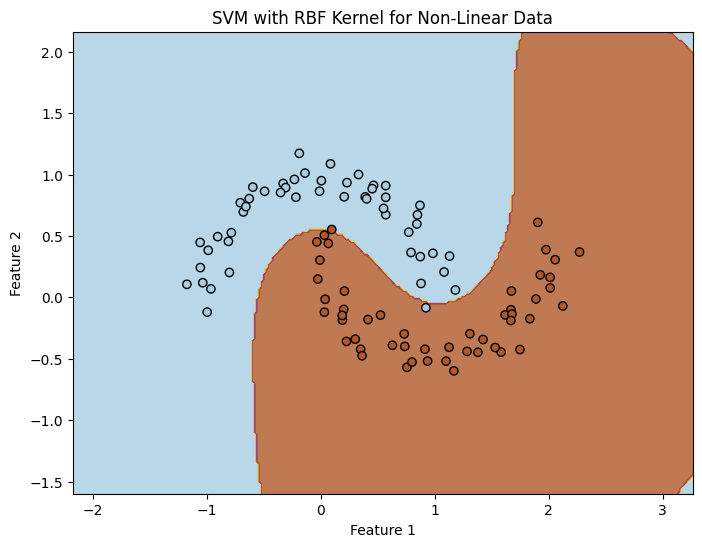

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# Generate non-linear dataset (moons)
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Train SVM model with RBF kernel
svm = SVC(kernel='rbf', gamma=1)
svm.fit(X, y)

# Plot decision boundary and data points
plt.figure(figsize=(8, 6))

# Plot decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.title('SVM with RBF Kernel for Non-Linear Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Effect of Different Kernels on Non-Linear Data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate non-linear dataset (moons)
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Define kernel types
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize lists to store accuracies and decision boundaries
accuracies = []
decision_boundaries = []

# Train SVM models with different kernels
for kernel in kernel_types:
    # Train SVM model
    if kernel == 'poly':
        svm = SVC(kernel=kernel, degree=3)  # Polynomial kernel with degree 3
    else:
        svm = SVC(kernel=kernel)
    svm.fit(X, y)

    # Predict labels
    y_pred = svm.predict(X)

    # Compute accuracy
    accuracy = accuracy_score(y, y_pred)
    accuracies.append(accuracy)

    # Store decision boundary
    decision_boundaries.append((svm, kernel))

# Plot decision boundaries
plt.figure(figsize=(15, 10))
for i, (svm, kernel) in enumerate(decision_boundaries, start=1):
    plt.subplot(2, 2, i)
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
    plt.title(f'Decision Boundary with {kernel.capitalize()} Kernel\nAccuracy: {accuracies[i-1]:.2f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
plt.tight_layout()

# Plot accuracy bar chart
plt.figure()
plt.bar(kernel_types, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Accuracy of SVM with Different Kernels')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.show()


## User Defined Kernal in sklearn SVM

Accuracy with custom kernel: 0.93


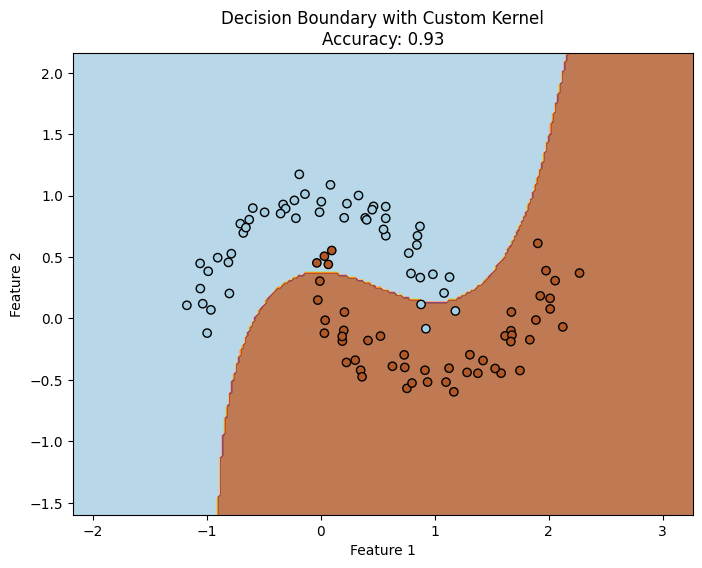

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate non-linear dataset (moons)
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Define custom kernel function
def custom_kernel(X1, X2):
    # Compute the squared Euclidean distance matrix
    distance_matrix = np.sum(X1**2, axis=1, keepdims=True) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    # Apply Gaussian (RBF) kernel
    gamma = 1 / X.shape[1]  # Gamma as 1 / number of features
    K = np.exp(-gamma * distance_matrix)
    return K

# Compute kernel matrix
K = custom_kernel(X, X)

# Train SVM model with user-defined kernel
svm = SVC(kernel='precomputed')
svm.fit(K, y)

# Predict labels
y_pred = svm.predict(K)

# Compute accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy with custom kernel:", accuracy)

# Plot decision boundary
plt.figure(figsize=(8, 6))
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Compute kernel matrix for decision boundary points
K_boundary = custom_kernel(np.c_[xx.ravel(), yy.ravel()], X)
Z = svm.predict(K_boundary)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.title(f'Decision Boundary with Custom Kernel\nAccuracy: {accuracy:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Application
1. **Classification**:
   - **Image Classification**: SVMs are widely used for tasks such as object recognition, facial recognition, and handwritten digit recognition.
   - **Text Classification**: SVMs can classify documents into different categories, such as spam detection, sentiment analysis, and topic categorization.
   - **Biomedical Classification**: SVMs are used in medical imaging for tasks like tumor detection, disease diagnosis, and gene expression analysis.
   - **Fraud Detection**: SVMs can identify fraudulent activities in credit card transactions, banking operations, and online transactions.

2. **Regression**:
   - **Predictive Maintenance**: SVMs can predict the remaining useful life of machinery and equipment based on various sensor data, helping in proactive maintenance scheduling.
   - **Stock Price Forecasting**: SVMs can predict future stock prices based on historical stock data and other relevant factors.
   - **Real Estate Price Prediction**: SVMs can predict real estate prices based on factors such as location, size, amenities, and market trends.

3. **Anomaly Detection**:
   - **Network Intrusion Detection**: SVMs can identify abnormal network traffic patterns indicative of intrusion or cyber attacks.
   - **Credit Risk Assessment**: SVMs can detect unusual patterns in credit card transactions or financial transactions, helping in fraud detection and risk assessment.

4. **Bioinformatics**:
   - **Protein Structure Prediction**: SVMs can predict the structure and function of proteins based on amino acid sequences and other biological features.
   - **Genomics and Proteomics**: SVMs are used for tasks such as gene expression analysis, protein classification, and protein-protein interaction prediction.

5. **Natural Language Processing (NLP)**:
   - **Named Entity Recognition**: SVMs can identify and classify entities such as names, dates, and locations in text data.
   - **Text Summarization**: SVMs can extract important information from text documents and generate summaries.
   - **Language Identification**: SVMs can determine the language of a given text document or segment.

6. **Geospatial Analysis**:
   - **Remote Sensing**: SVMs can classify land cover types, detect changes in land use, and monitor environmental changes using satellite imagery and remote sensing data.
   - **Spatial Data Analysis**: SVMs can predict soil properties, crop yield, and land suitability for agriculture based on geospatial data.


## Named Entity Recognition using SVM

In [ ]:
import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Sample training data
training_data = [
    ("Apple is headquartered in Cupertino.", "ORG"),
    ("Barack Obama was the 44th President of the United States.", "PERSON"),
    ("The Eiffel Tower is located in Paris.", "LOCATION"),
    ("The meeting is scheduled for Monday.", "DATE")
]

# Tokenize training data and extract features
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize)
X_train = vectorizer.fit_transform([data[0] for data in training_data])
y_train = np.array([data[1] for data in training_data])

# Train SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Sample test data
test_data = [
    "Amazon has its headquarters in Seattle.",
    "Angela Merkel is the Chancellor of Germany.",
    "Tokyo is the capital of Japan.",
    "The conference will be held on Friday."
]

# Tokenize and transform test data
X_test = vectorizer.transform(test_data)

# Predict named entities
y_pred = svm.predict(X_test)

# Print predicted named entities
print("Predicted named entities:")
for text, entity in zip(test_data, y_pred):
    print(f"{text}: {entity}")

# Evaluate model
# (Note: In practice, you would typically have labeled test data to evaluate the model)
print("\nClassification Report:")
print(classification_report(['ORG', 'PERSON', 'LOCATION', 'DATE'], y_pred))


## MNIST data classification using SVM

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
X_train = X_train / 255.0
X_test = X_test / 255.0

# Train SVM model
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Regression using SVM (Linear)

Train MSE: 0.8649708735828519
Test MSE: 0.6207640228491864


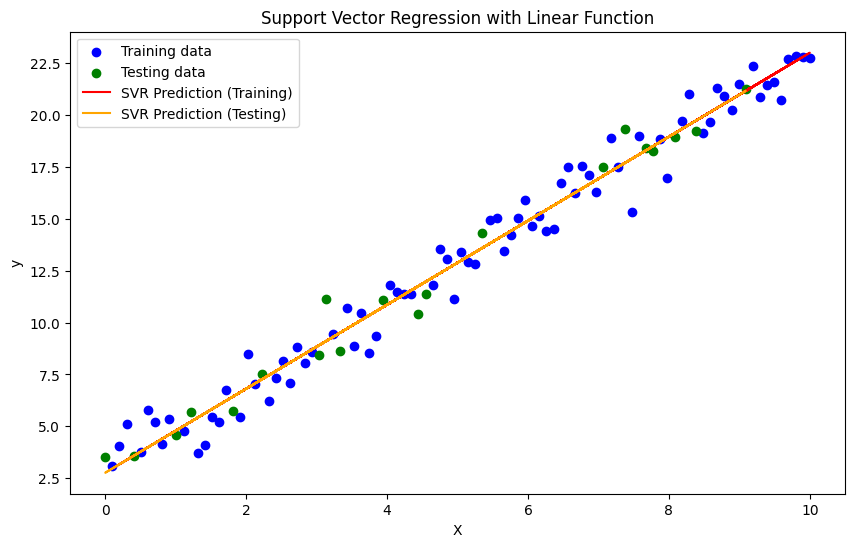

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.ravel() + 3 + np.random.normal(0, 1, size=X.shape[0])  # Linear function: y = 2X + 3

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR model
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predict on training and testing sets
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)

# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_train, y_pred_train, color='red', label='SVR Prediction (Training)')
plt.plot(X_test, y_pred_test, color='orange', label='SVR Prediction (Testing)')
plt.title('Support Vector Regression with Linear Function')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## Regression using non linear 2D input data

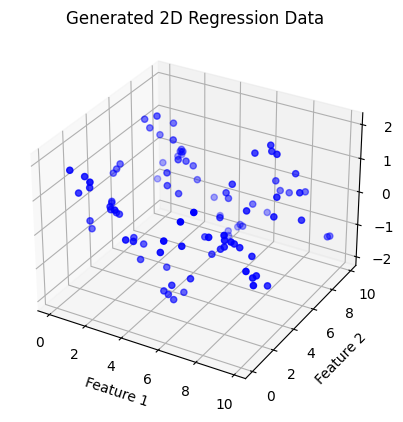

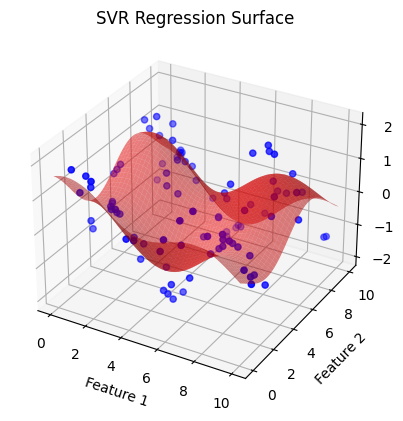

Train MSE: 0.2152374529015233


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

# Generate 2D regression data
np.random.seed(42)
X1 = np.random.rand(100, 1) * 10  # Feature 1
X2 = np.random.rand(100, 1) * 10  # Feature 2
y = np.sin(X1) + np.cos(X2) + np.random.normal(0, 0.1, size=(100, 1))  # Target variable

# Plot generated data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='b')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('Generated 2D Regression Data')
plt.show()

# Train SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(np.hstack((X1, X2)), y.ravel())

# Generate grid for surface plot
X1_surf, X2_surf = np.meshgrid(np.linspace(0, 10, 50), np.linspace(0, 10, 50))
y_pred_surf = svr.predict(np.hstack((X1_surf.reshape(-1, 1), X2_surf.reshape(-1, 1)))).reshape(X1_surf.shape)

# Plot regression surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='b')
ax.plot_surface(X1_surf, X2_surf, y_pred_surf, color='r', alpha=0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('SVR Regression Surface')
plt.show()

# Predict on training data and calculate Mean Squared Error
y_pred_train = svr.predict(np.hstack((X1, X2)))
train_mse = mean_squared_error(y, y_pred_train)
print("Train MSE:", train_mse)
